In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# EDA

In [89]:
df = pd.read_csv("spotify-hitprediction.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,ID
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,Yes,21107
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,No,21108
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,No,21109
3,0.697,0.673,0,-10.573,1,0.0266,0.714,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,No,21110
4,0.662,0.272,0,-18.883,1,0.0313,0.360,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,No,21111


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21106 entries, 0 to 21105
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21106 non-null  float64
 1   energy            21106 non-null  float64
 2   key               21106 non-null  int64  
 3   loudness          21106 non-null  float64
 4   mode              21106 non-null  int64  
 5   speechiness       21106 non-null  float64
 6   acousticness      21106 non-null  float64
 7   instrumentalness  21106 non-null  float64
 8   liveness          21106 non-null  float64
 9   valence           21106 non-null  float64
 10  tempo             21106 non-null  float64
 11  duration_ms       21106 non-null  int64  
 12  time_signature    21106 non-null  int64  
 13  chorus_hit        21106 non-null  float64
 14  sections          21106 non-null  int64  
 15  target            21106 non-null  object 
 16  ID                21106 non-null  int64 

In [91]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,ID
count,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,21106.000000,2.110600e+04,21106.000000,21106.000000,21106.000000,21106.000000
mean,0.540066,0.579125,5.194873,-10.213906,0.693405,0.072935,0.365411,0.152241,0.202456,0.542941,119.573453,2.345562e+05,3.894438,40.009229,10.477589,31659.500000
std,0.176836,0.252387,3.540375,5.276508,0.461091,0.087133,0.339019,0.301580,0.174558,0.267043,29.064122,1.154050e+05,0.416254,19.072171,4.797663,6092.921727
min,0.000000,0.000348,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.014600,0.000000,0.000000,1.562900e+04,0.000000,0.000000,0.000000,21107.000000
25%,0.420000,0.396000,2.000000,-12.786000,0.000000,0.033600,0.039000,0.000000,0.094200,0.330000,97.865000,1.728385e+05,4.000000,27.539205,8.000000,26383.250000
50%,0.552000,0.601000,5.000000,-9.255500,1.000000,0.043200,0.261000,0.000115,0.132000,0.559000,117.964000,2.175730e+05,4.000000,35.771650,10.000000,31659.500000
75%,0.670000,0.786000,8.000000,-6.399000,1.000000,0.069400,0.676000,0.056600,0.261000,0.767000,136.793500,2.662100e+05,4.000000,47.537617,12.000000,36935.750000
max,0.986000,0.999000,11.000000,0.450000,1.000000,0.960000,0.996000,0.999000,0.999000,0.996000,233.429000,3.816373e+06,5.000000,433.182000,145.000000,42212.000000


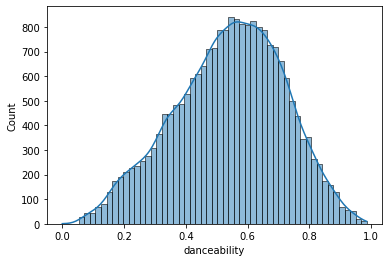

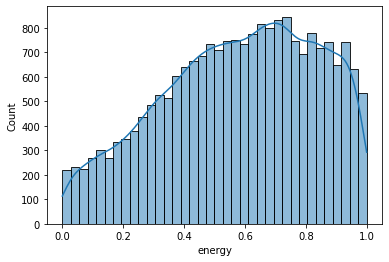

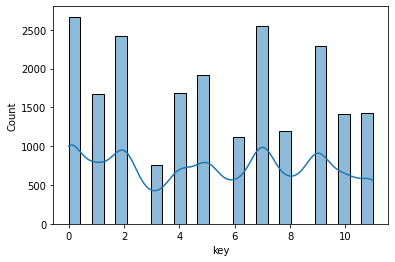

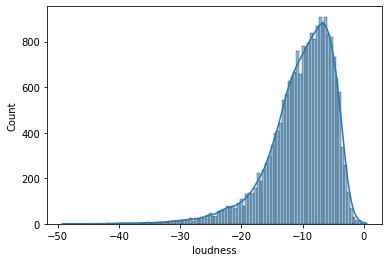

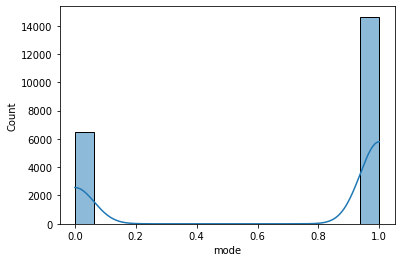

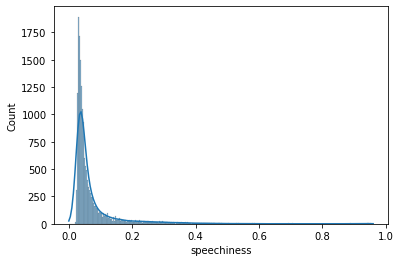

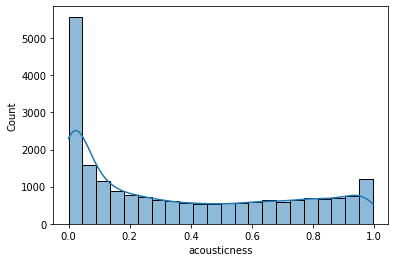

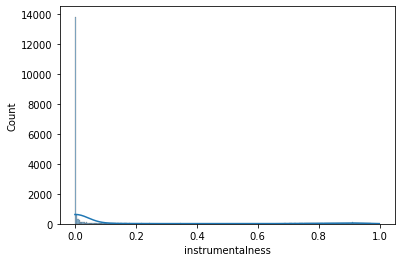

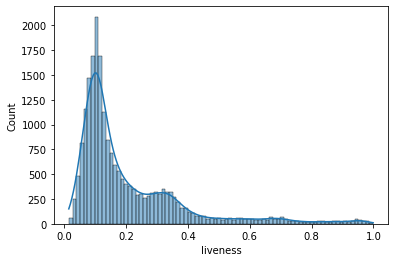

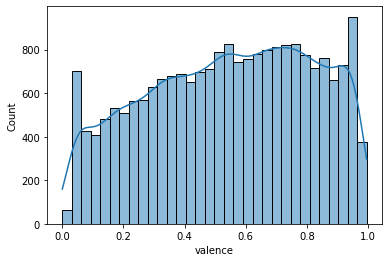

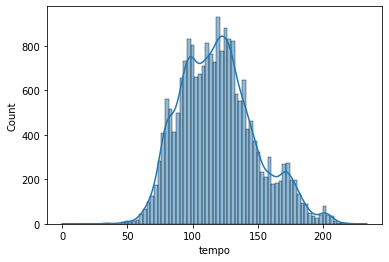

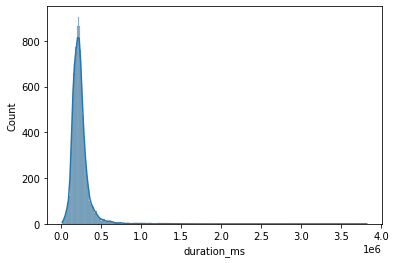

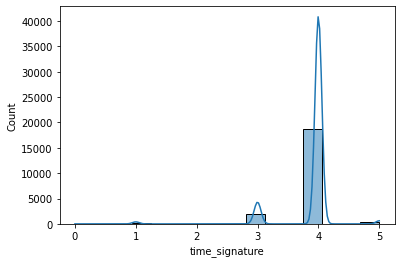

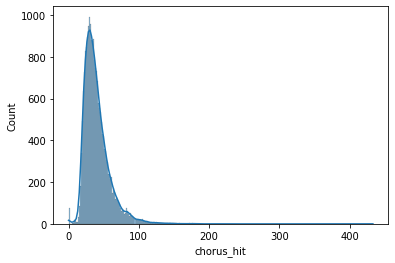

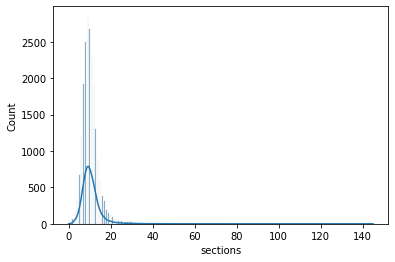

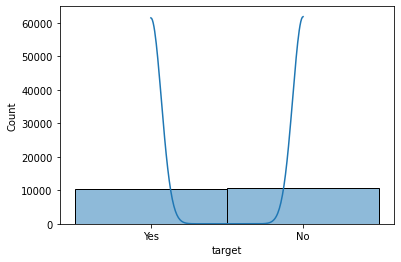

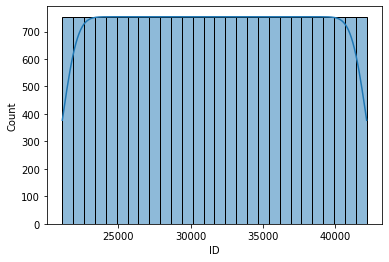

In [92]:
for i in df:
    sns.histplot(df[i], kde= True)
    plt.show()

<AxesSubplot:>

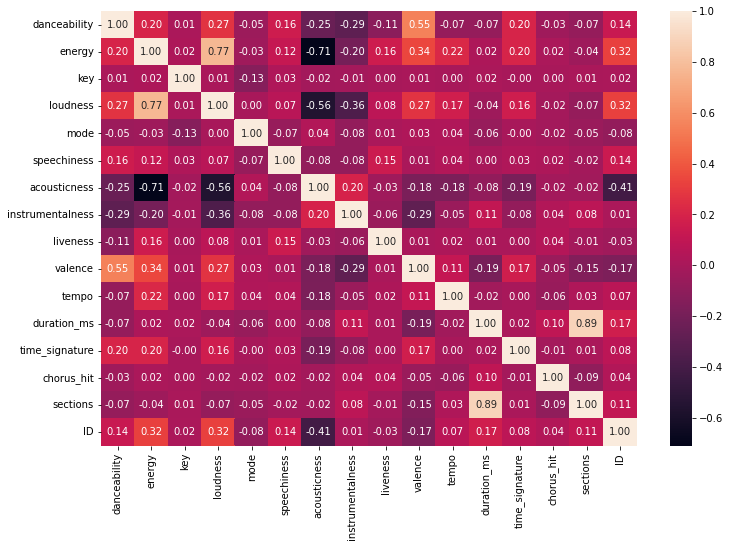

In [93]:
correlation_matrix = df.corr()
plt.figure(figsize= (12,8))
sns.heatmap(correlation_matrix, annot= True, fmt = ".2f")

# Preprocessing

In [94]:
# Encoding the label "target"
df["target"] = LabelEncoder().fit_transform(df["target"])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,ID
0,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,21107
1,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,21108
2,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,21109
3,0.697,0.673,0,-10.573,1,0.0266,0.7140,0.919000,0.1220,0.7780,112.117,167667,4,65.48604,7,0,21110
4,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.5910,143.507,134360,4,47.82155,7,0,21111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21101,0.565,0.805,0,-4.457,1,0.0489,0.0808,0.000000,0.1730,0.8690,76.040,181933,4,38.94659,7,1,42208
21102,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,240400,4,91.20552,7,1,42209
21103,0.780,0.784,1,-5.039,1,0.1860,0.0447,0.000000,0.1220,0.4300,85.023,180706,4,46.62277,8,1,42210
21104,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,42211


In [95]:
def drop_outliers(df):
    for col in df:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = drop_outliers(df)
# df.reset_index(drop=True, inplace=True)
df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,ID
1,0.498,0.505,3,-12.475,1,0.0337,0.01800,0.107000,0.176,0.797,101.801,213613,4,48.82510,10,0,21108
2,0.657,0.649,5,-13.392,1,0.0380,0.84600,0.000004,0.119,0.908,115.940,223960,4,37.22663,12,0,21109
5,0.520,0.411,9,-12.411,1,0.0315,0.78600,0.001200,0.146,0.350,120.290,207573,4,37.54527,9,1,21112
6,0.717,0.565,2,-8.606,0,0.0283,0.45100,0.000000,0.108,0.961,100.757,134507,4,49.41165,6,0,21113
8,0.521,0.396,5,-12.299,1,0.0463,0.57600,0.000893,0.462,0.599,82.628,179600,4,48.36482,8,0,21115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21082,0.441,0.802,0,-6.411,1,0.0305,0.01040,0.000063,0.123,0.783,148.023,218356,4,33.08026,9,0,42189
21086,0.457,0.951,0,-3.713,1,0.0742,0.00244,0.000000,0.216,0.443,83.011,283867,4,43.80704,13,0,42193
21088,0.610,0.841,7,-4.579,0,0.0692,0.05600,0.000010,0.118,0.431,126.889,198187,4,50.21639,9,1,42195
21089,0.565,0.853,2,-6.008,1,0.0289,0.00053,0.000099,0.346,0.501,110.008,286093,4,47.76517,15,0,42196


In [96]:
#null values
df.isnull().sum()

#fill null values
for i in df :
    df[i] = df[i].fillna(df[i].mean())

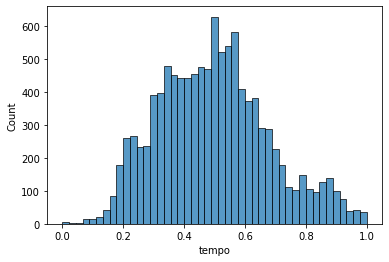

In [97]:
#Normalization
df[["tempo"]] = MinMaxScaler().fit_transform(df[["tempo"]])
sns.histplot(df['tempo'])
plt.show()

In [98]:
#Splitting
x = df.drop("target", axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.269, random_state=69)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

7964
7964
2931
2931


## Modeling

In [99]:
# Using logistic regression

model = LogisticRegression()
model.fit(x_train,y_train)




LogisticRegression()

In [100]:
y_pred = model.predict(x_test)
print(f"accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
print(f"classification_report:\n{classification_report(y_test,y_pred)}")
print(f"ROC  score : {roc_auc_score(y_test,y_pred)}")

accuracy = 0.6605254179460934
Confusion Matrix :
[[   9  992]
 [   3 1927]]
classification_report:
              precision    recall  f1-score   support

           0       0.75      0.01      0.02      1001
           1       0.66      1.00      0.79      1930

    accuracy                           0.66      2931
   macro avg       0.71      0.50      0.41      2931
weighted avg       0.69      0.66      0.53      2931

ROC  score : 0.5037183024229657


In [101]:
# Naive Bayes   

model_NB = GaussianNB()
model_NB.fit(x_train,y_train)


GaussianNB()

In [102]:
y_pred = model_NB.predict(x_test)
print(f"accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
print(f"classification_report:\n{classification_report(y_test,y_pred)}")
print(f"ROC  score : {roc_auc_score(y_test,y_pred)}")

accuracy = 0.6711020129648584
Confusion Matrix :
[[ 150  851]
 [ 113 1817]]
classification_report:
              precision    recall  f1-score   support

           0       0.57      0.15      0.24      1001
           1       0.68      0.94      0.79      1930

    accuracy                           0.67      2931
   macro avg       0.63      0.55      0.51      2931
weighted avg       0.64      0.67      0.60      2931

ROC  score : 0.5456504635261112
